# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import openweathermapy as owm
from datetime import datetime 

# Resize for specific notebook margin
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Remove possible warnings
import warnings
warnings.filterwarnings('ignore')

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
sample_size = 500

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
column_names = ('City', 'Cloudiness', 'Country', 'Date', 
                'Humidity', 'Lat', 'Lng', 'Max Temp','Wind Speed')
WeatherPy_df = pd.DataFrame(columns = column_names)
WeatherPy_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
count = 1
sets = 1
error = 0
index = 0
t0 =time.time()

settings = {"units": "imperial", "appid": api_key}

print("Beginning Data Retrieval \n --------------------------------------")


for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(f"City not found. Skipping...")
        pass
        error= error+1
    count = count+1
    if count == 50:
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()
    
      

print("--------------------------------------- \n Data Retrieval Complete \n --------------------------------------")
print(f'Could not get data for {error} cities')


Beginning Data Retrieval 
 --------------------------------------
Processing Record 1 of Set 1 | richards bay
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | inndyr
Processing Record 4 of Set 1 | newton
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ust-tsilma
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | komsomolskiy
Processing Record 10 of Set 1 | dicabisagan
Processing Record 11 of Set 1 | tete
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | inhambane
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | lokosovo
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | buqayq
City not found. Skipping...
Processing Record 21 of Set 1 | lanzhou
Processing Record 22 of Set 1 | katsuura

Processing Record 33 of Set 4 | cherskiy
Processing Record 34 of Set 4 | aykhal
Processing Record 35 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 4 | buta
Processing Record 37 of Set 4 | saskylakh
Processing Record 38 of Set 4 | kodiak
Processing Record 39 of Set 4 | pangody
Processing Record 40 of Set 4 | nara
Processing Record 41 of Set 4 | mangan
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | sioux lookout
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | coulihaut
City not found. Skipping...
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | aksu
Processing Record 1 of Set 5 | pella
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | haysville
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | los altos
Processing Record 6 of Set 5 | narrabri
Process

Processing Record 25 of Set 8 | batticaloa
Processing Record 26 of Set 8 | emerald
Processing Record 27 of Set 8 | muhos
Processing Record 28 of Set 8 | winnemucca
Processing Record 29 of Set 8 | curumani
Processing Record 30 of Set 8 | amarpur
Processing Record 31 of Set 8 | kaitangata
Processing Record 32 of Set 8 | diffa
Processing Record 33 of Set 8 | baykit
Processing Record 34 of Set 8 | utiroa
City not found. Skipping...
Processing Record 35 of Set 8 | piqua
Processing Record 36 of Set 8 | altay
Processing Record 37 of Set 8 | vilyuysk
Processing Record 38 of Set 8 | lolua
City not found. Skipping...
Processing Record 39 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 8 | coolum beach
Processing Record 41 of Set 8 | nguiu
City not found. Skipping...
Processing Record 42 of Set 8 | nelson bay
Processing Record 43 of Set 8 | honiara
Processing Record 44 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 45 of Set 8 | impfondo
Process

City not found. Skipping...
Processing Record 16 of Set 12 | biu
Processing Record 17 of Set 12 | palmer
Processing Record 18 of Set 12 | russell
Processing Record 19 of Set 12 | khorixas
Processing Record 20 of Set 12 | touros
Processing Record 21 of Set 12 | menongue
Processing Record 22 of Set 12 | matagami
Processing Record 23 of Set 12 | necochea
Processing Record 24 of Set 12 | lubango
Processing Record 25 of Set 12 | esteli
Processing Record 26 of Set 12 | rabo de peixe
Processing Record 27 of Set 12 | vilhena
Processing Record 28 of Set 12 | havre-saint-pierre
Processing Record 29 of Set 12 | bonthe
Processing Record 30 of Set 12 | wajir
Processing Record 31 of Set 12 | shablykino
Processing Record 32 of Set 12 | lahad datu
Processing Record 33 of Set 12 | ayan
Processing Record 34 of Set 12 | lebedyn
Processing Record 35 of Set 12 | dubbo
Processing Record 36 of Set 12 | nizhniy kuranakh
Processing Record 37 of Set 12 | mocuba
Processing Record 38 of Set 12 | mindelo
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
WeatherPy_df.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [15]:
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8',index=False)

In [16]:
WeatherPy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Richards Bay,65,ZA,1563644751,69,-28.77,32.06,62.62,42.93
1,Cabo San Lucas,5,MX,1563644536,58,22.89,-109.91,91.99,8.05
2,Inndyr,20,NO,1563644752,63,67.03,14.03,64.4,9.17
3,Newton,40,US,1563644752,53,42.34,-71.21,96.01,6.93
4,Punta Arenas,75,CL,1563644752,80,-53.16,-70.91,35.6,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

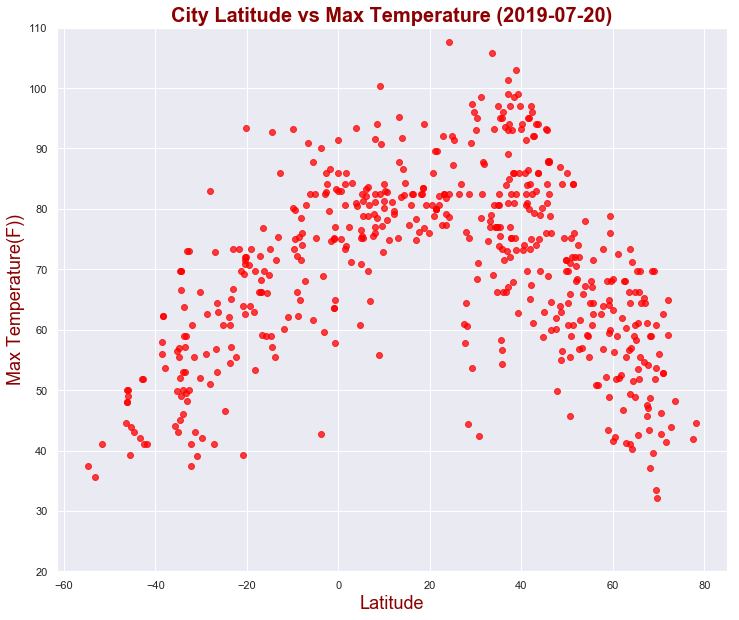

In [63]:
plt.figure(figsize =(12,10))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color = "red", alpha=.75)
plt.grid(True)
plt.ylim(20,110)
plt.xlabel('Latitude', fontsize = 18, color = "darkred" )
plt.ylabel('Max Temperature(F))', fontsize = 18, color = "darkred")
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})', fontsize = 20, fontweight='bold', color = 'darkred')
plt.savefig("City_Latitude_vs_Max_Temperature.png")
plt.show()

### Latitude vs. Humidity Plot

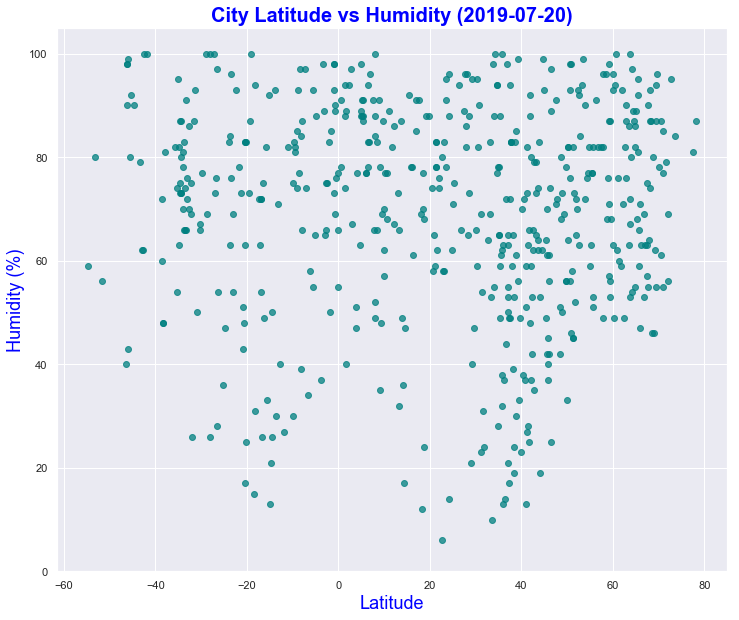

In [68]:
plt.figure(figsize =(12,10))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color = "teal", alpha=.75)
plt.ylim(0,105)
plt.grid(True)
plt.xlabel('Latitude', fontsize = 18, color = "blue" )
plt.ylabel('Humidity (%)', fontsize = 18, color = "blue")
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})', fontsize = 20, fontweight='bold', color = 'blue')
plt.savefig("City_Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

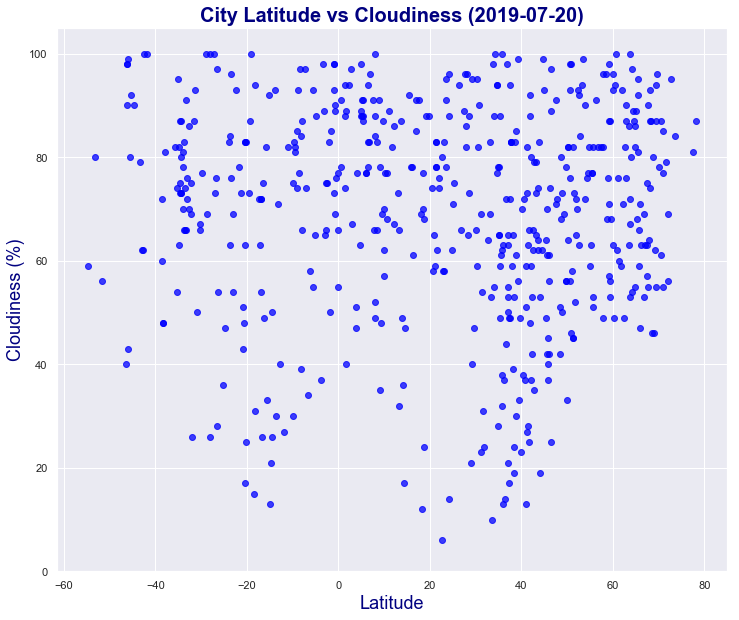

In [71]:
plt.figure(figsize =(12,10))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color = "blue", alpha=.75)
plt.ylim(0,105)
plt.grid(True)
plt.xlabel('Latitude', fontsize = 18, color = "navy" )
plt.ylabel('Cloudiness (%)', fontsize = 18, color = "navy")
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})', fontsize = 20, fontweight='bold', color = 'navy')
plt.savefig("City_Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

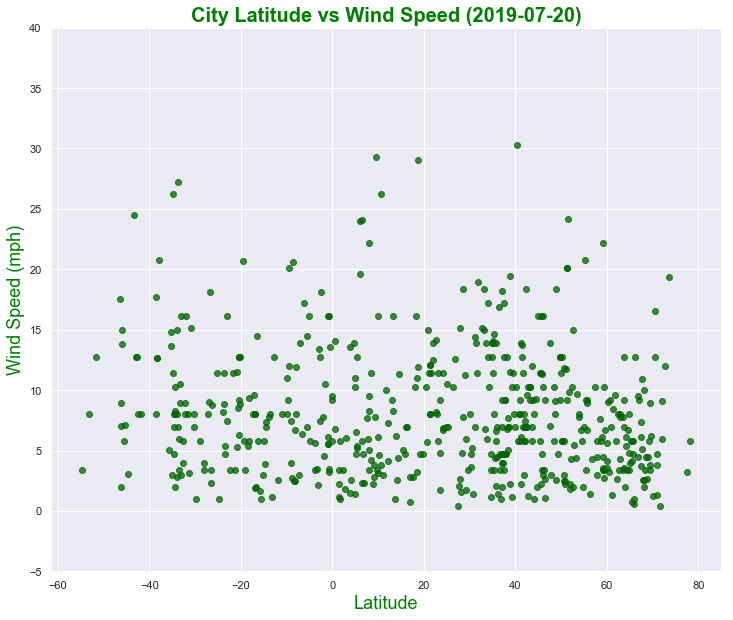

In [75]:
plt.figure(figsize =(12,10))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color = "darkgreen", alpha=.75)
plt.ylim(-5,40)
plt.grid(True)
plt.xlabel('Latitude', fontsize = 18, color = "green" )
plt.ylabel('Wind Speed (mph)', fontsize = 18, color = "green")
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})', fontsize = 20, fontweight='bold', color = 'green')
plt.savefig("City_Latitude_vs_Wind_Speed.png")
plt.show()